/var/folders/by/h_w_vc0s2tn12crc1306f9nw0000gn/T/ipykernel_88607/1815497502.py:62: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


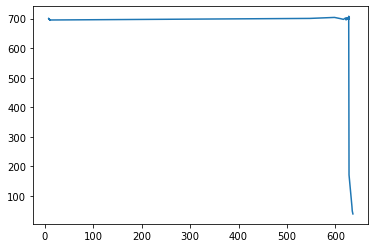

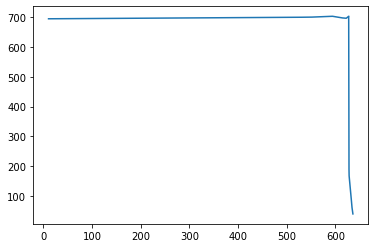

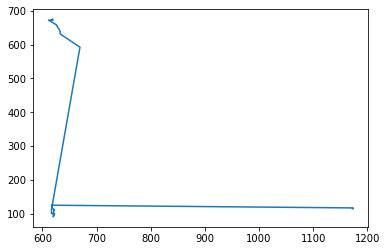

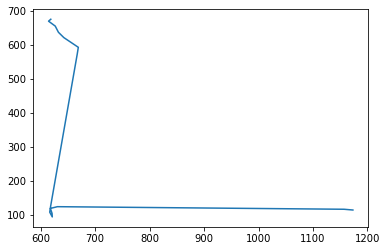

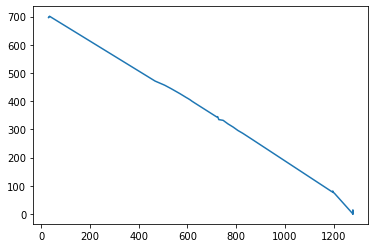

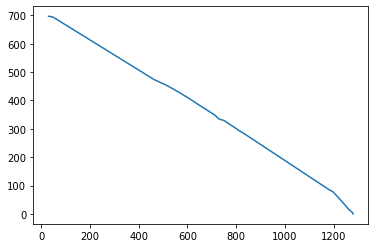

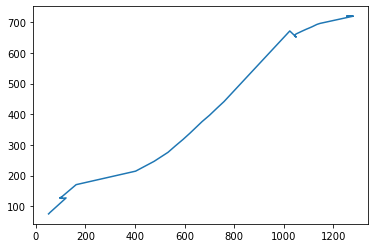

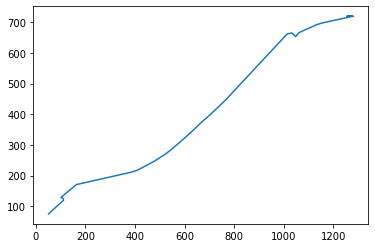

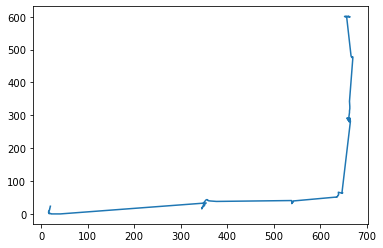

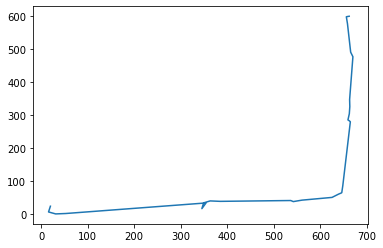

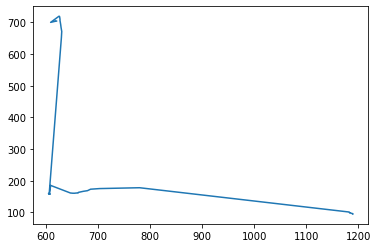

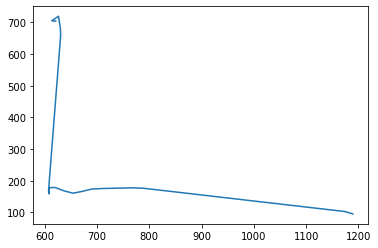

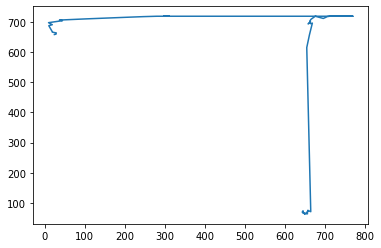

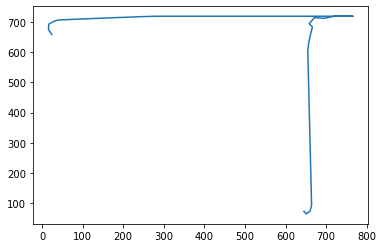

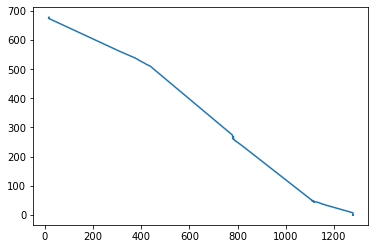

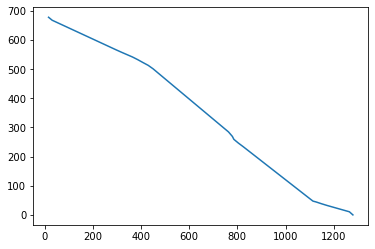

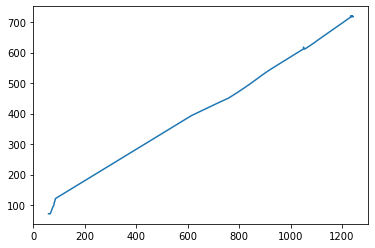

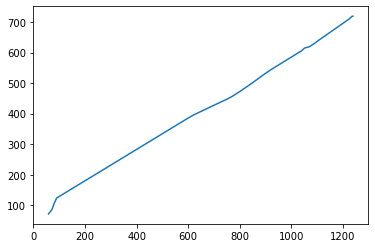

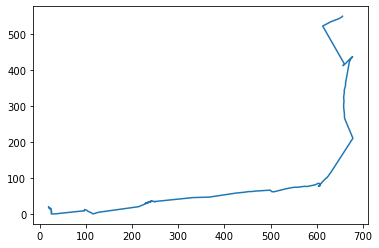

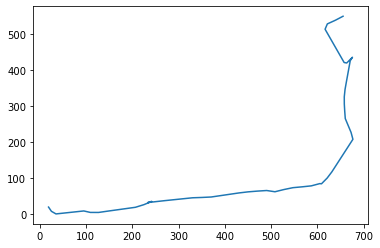

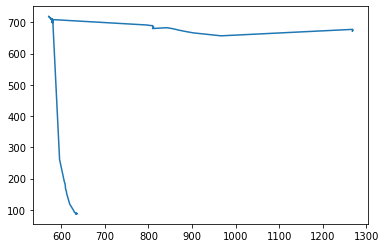

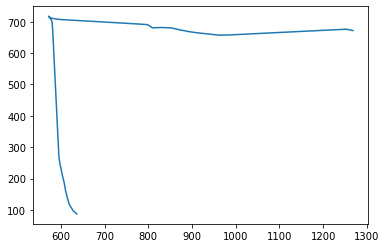

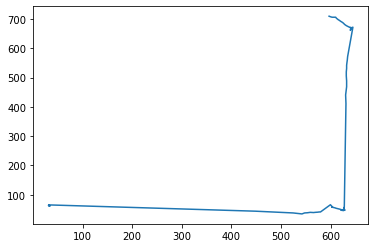

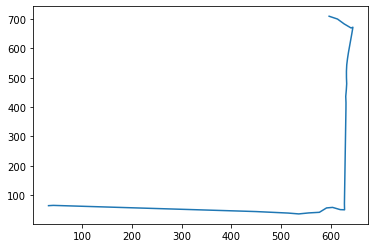

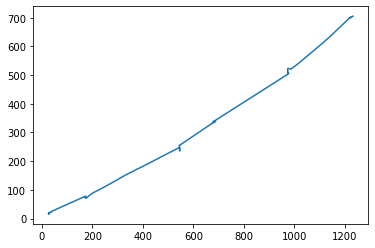

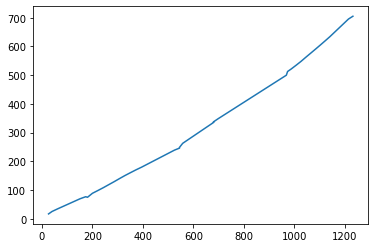

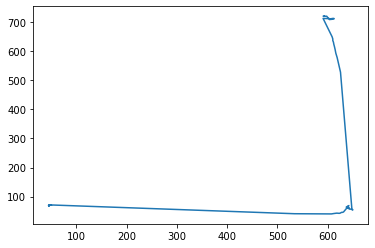

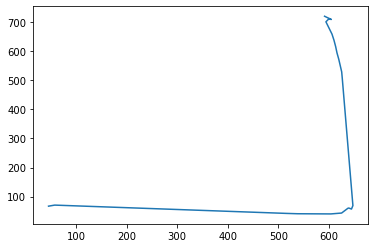

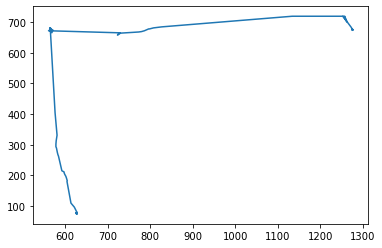

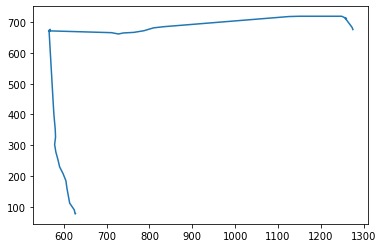

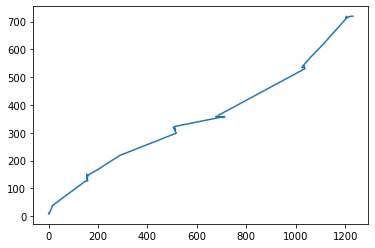

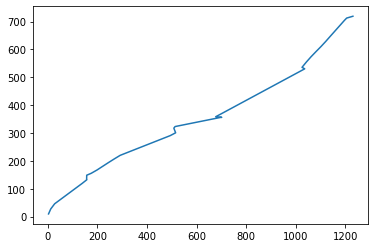

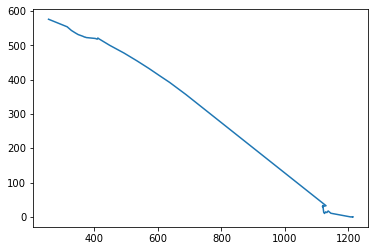

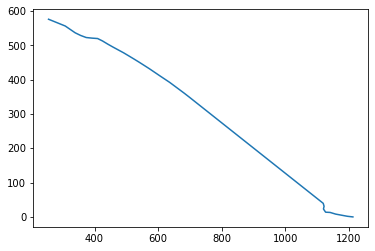

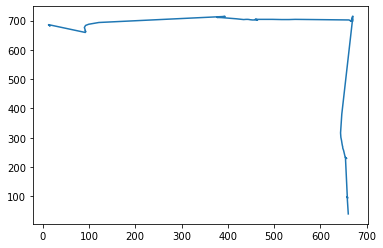

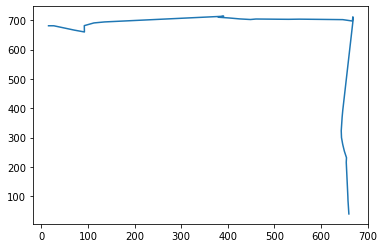

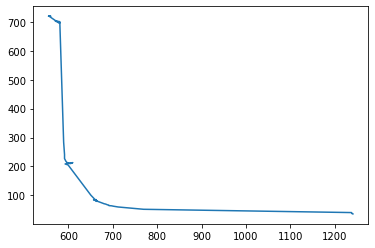

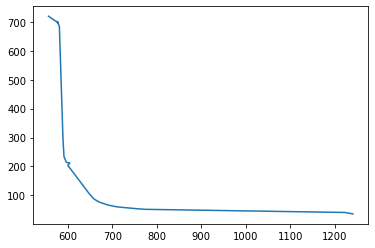

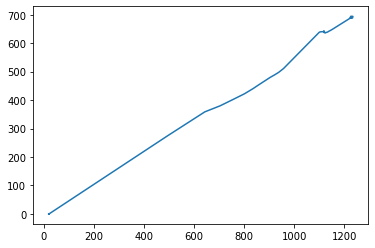

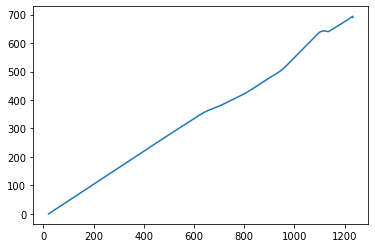

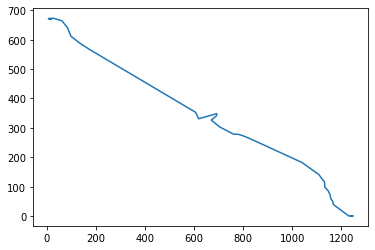

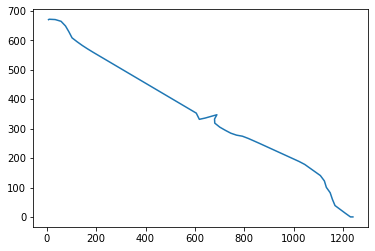

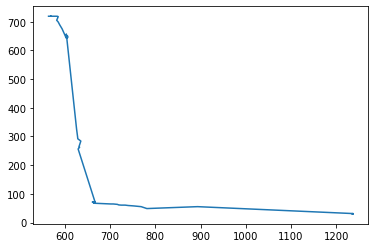

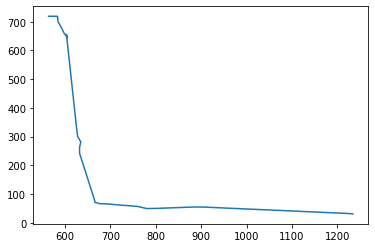

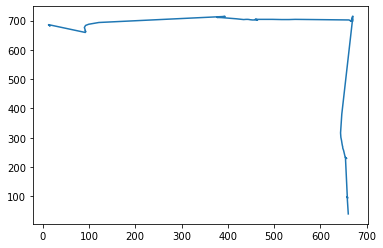

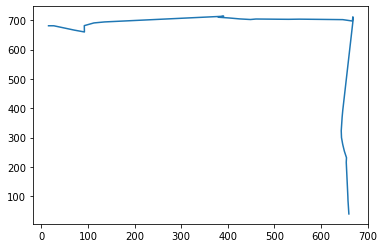

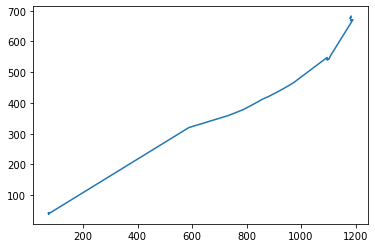

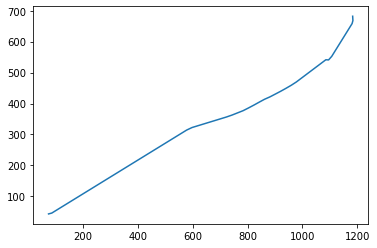

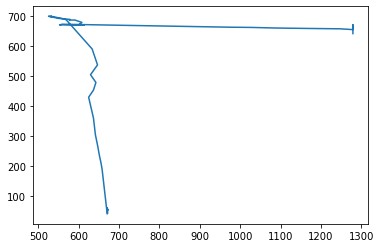

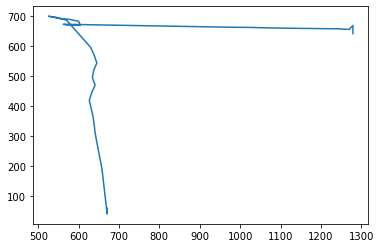

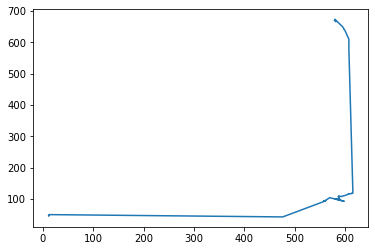

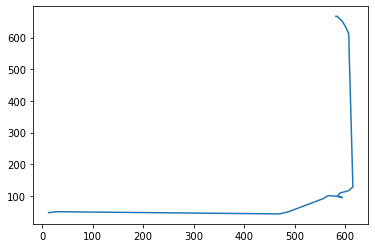

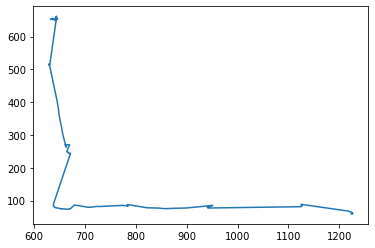

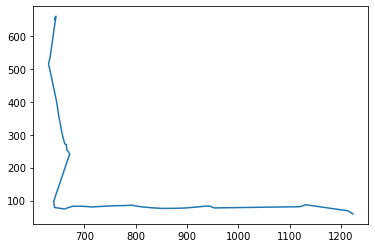

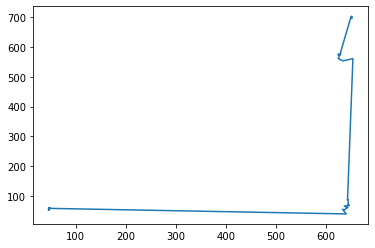

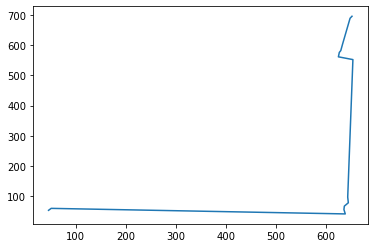

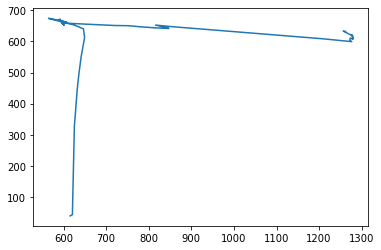

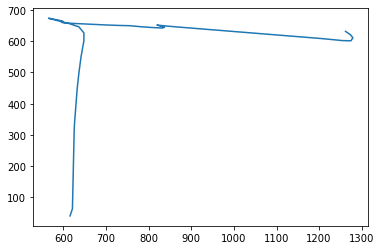

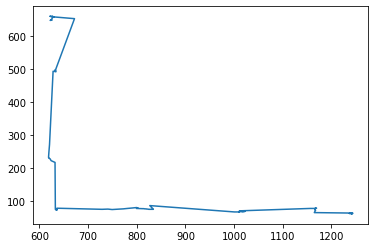

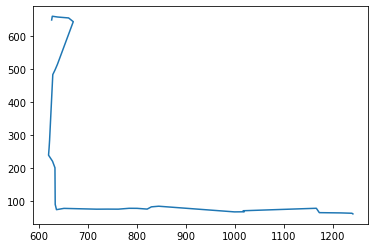

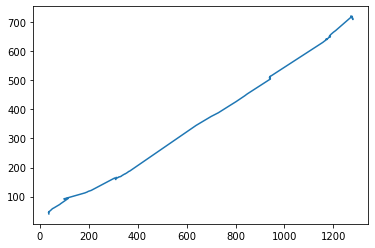

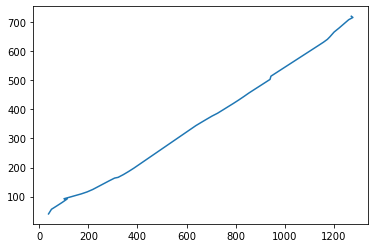

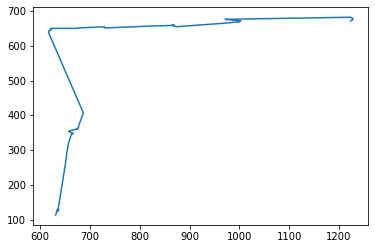

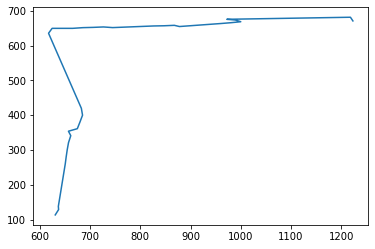

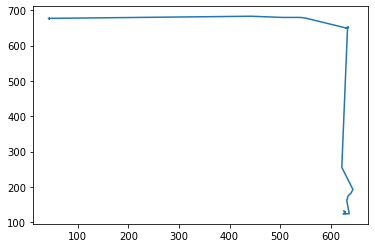

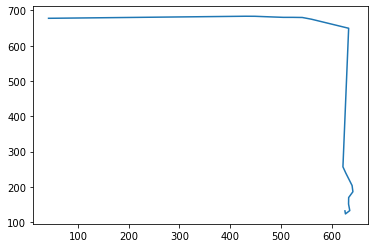

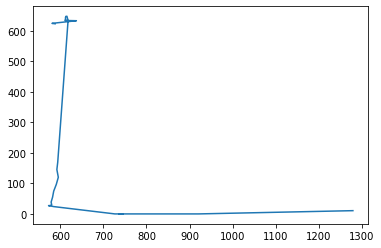

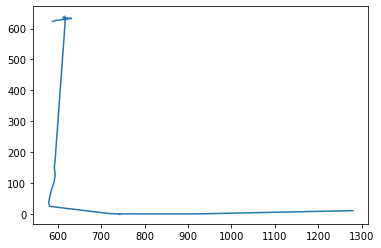

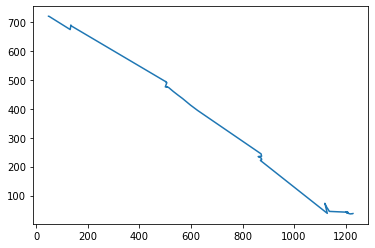

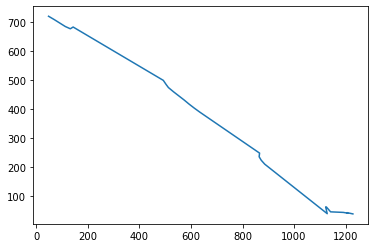

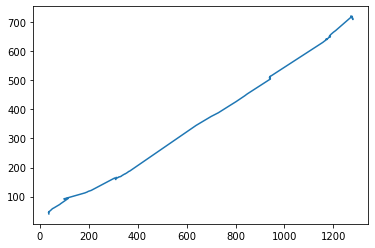

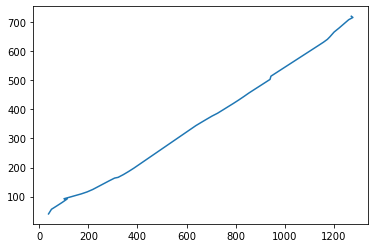

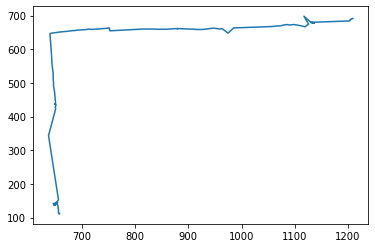

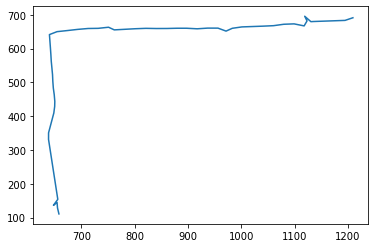

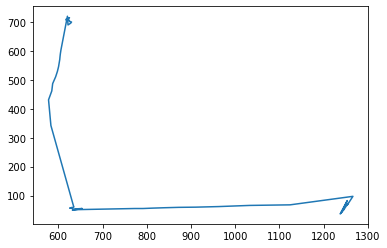

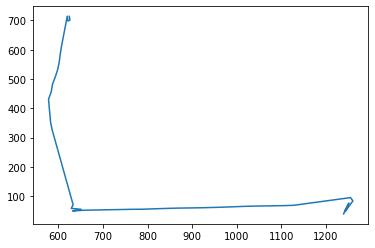

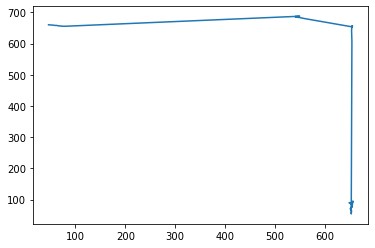

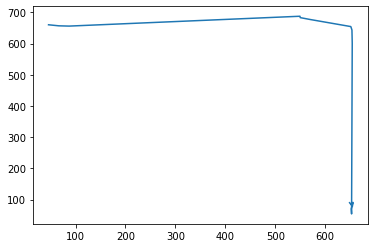

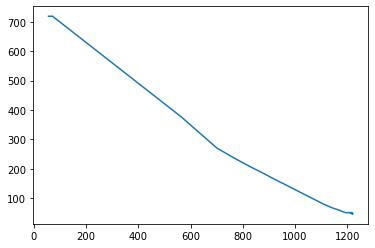

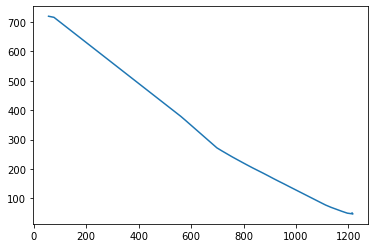

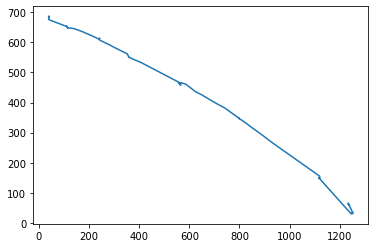

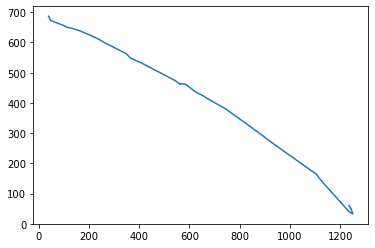

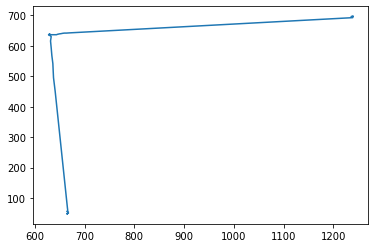

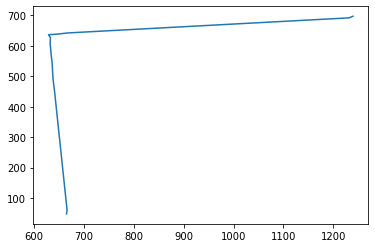

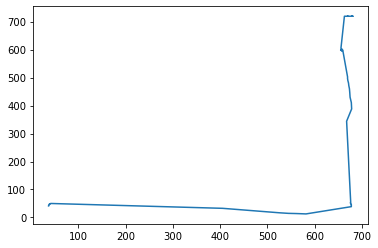

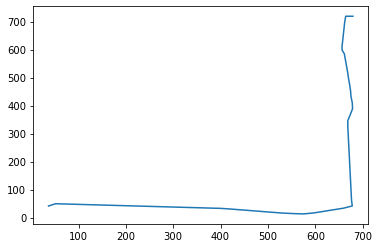

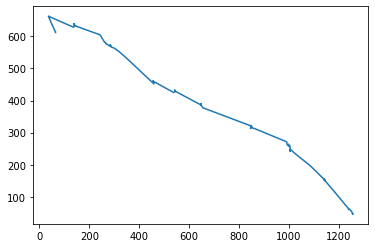

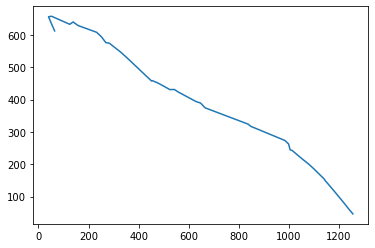

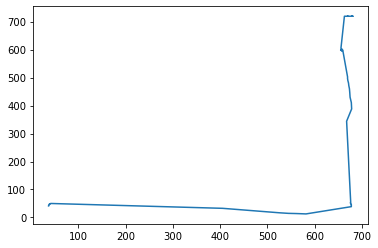

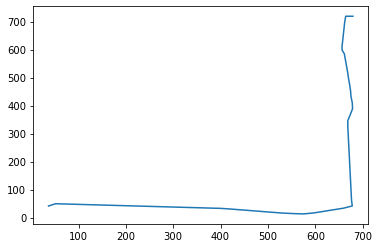

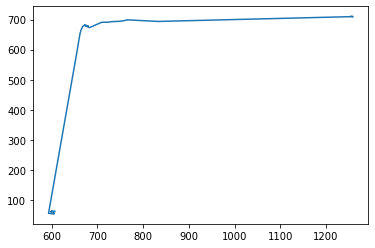

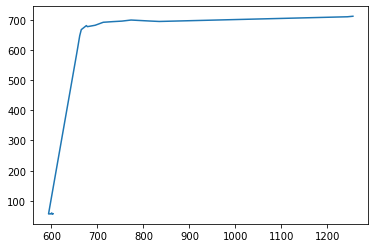

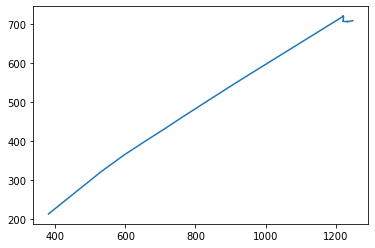

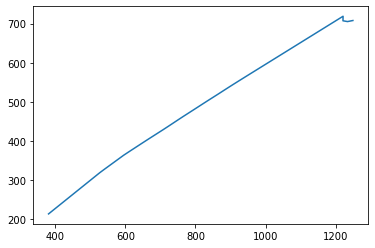

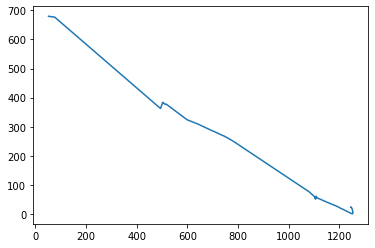

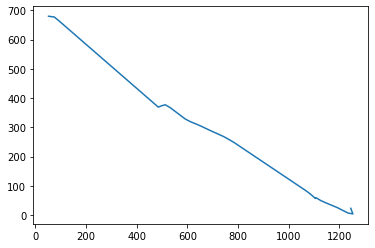

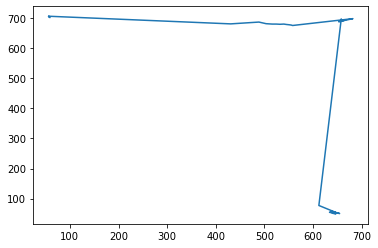

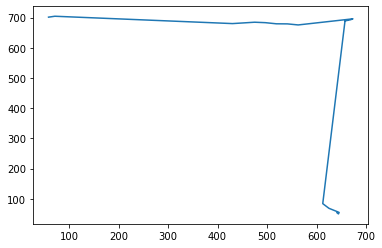

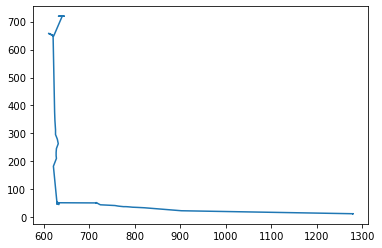

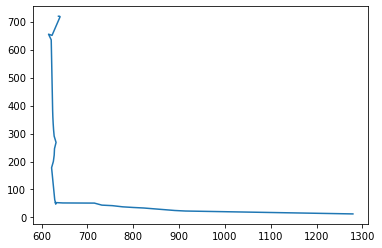

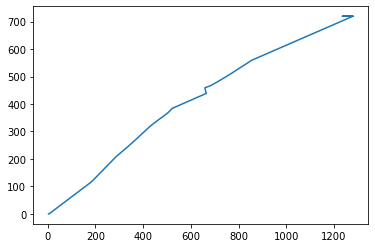

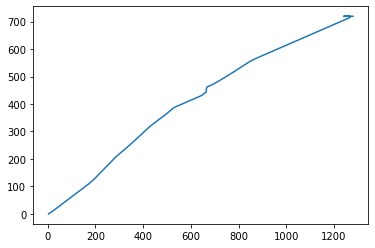

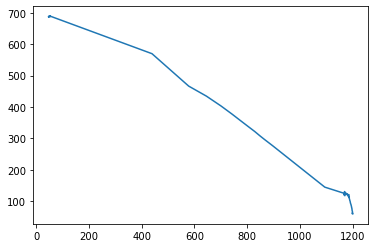

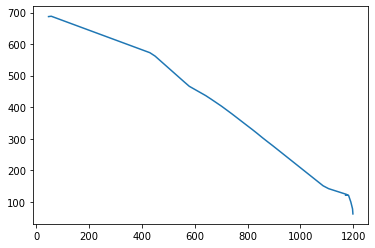

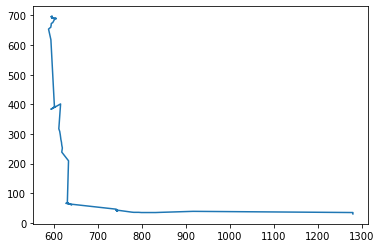

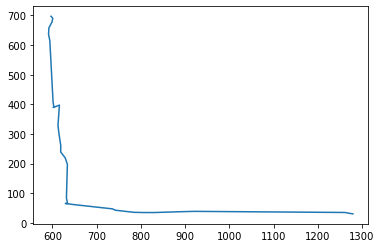

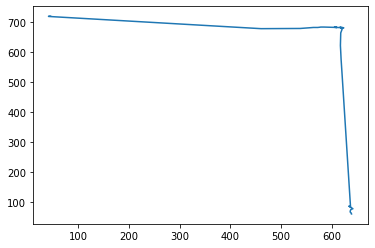

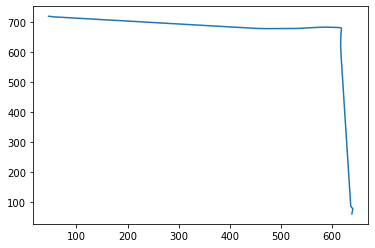

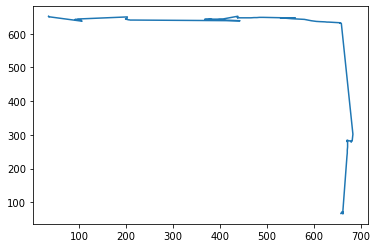

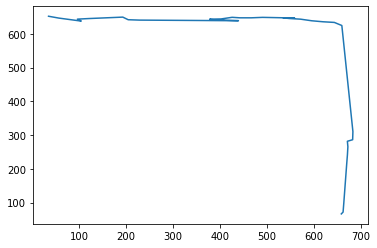

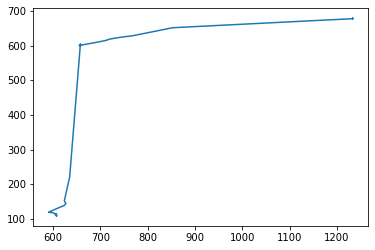

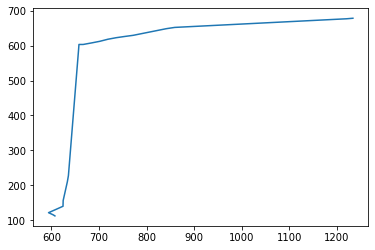

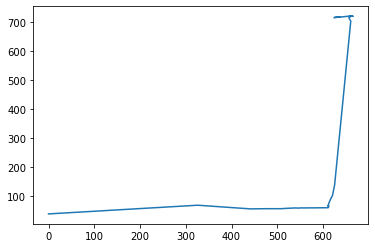

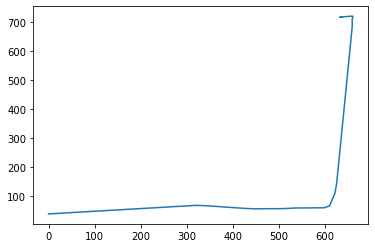

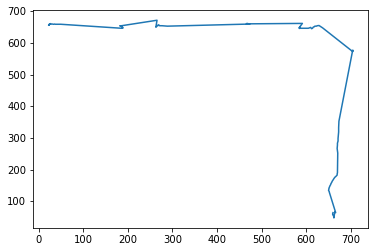

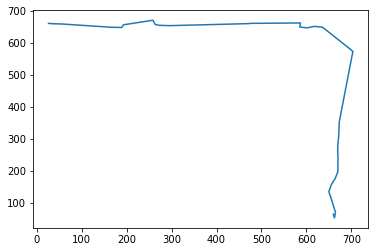

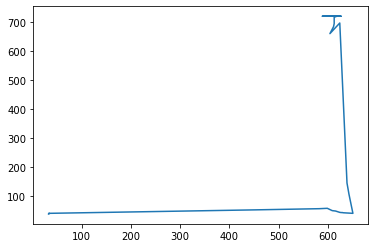

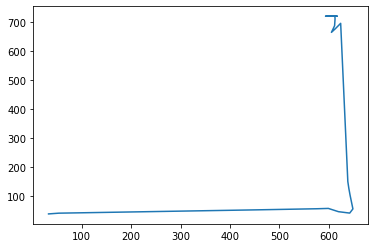

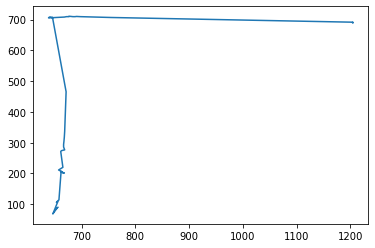

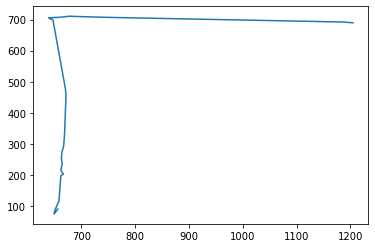

In [6]:
import pandas as pd
import math
import os
import glob
import matplotlib.pyplot as plt

def delta(col, ind1, ind2=None):
    if ind2 == None:
        return col[ind1] - col[ind1-1]
    return col[ind1] - col[ind2]

def cleanData(df):
    # delete rows that have repeated values that are the same as the one right above. 
    try: 
        for index, row in df.iterrows():
            if row[1] == df.iloc[index-1][1] and row[2] == df.iloc[index-1][2]:
                df = df.drop(labels=index, axis=0)
    except:
        pass

def calculateRubine(df):
    cleanData(df)
    x_col = df.iloc[:, 1]
    y_col = df.iloc[:, 2]
    f8 = 0
    for i in range(1, df.shape[0], 1):
        f8 += math.sqrt(delta(x_col, i)**2 + delta(y_col, i)**2)
    return x_col, y_col, f8

def indexPoint(df, startX, startY):
    df[startX]

def resample():
    path = "resample-data/"
    csv_files = glob.glob(os.path.join(path, "*.csv"))
    for f in csv_files:
        df = pd.read_csv(f, header=None)
        x_col, y_col, length = calculateRubine(df)
        results = [[x_col[0], y_col[0]]]
        unit = length / 63
        ind = 1
        while ind < 64:
            # if unit*ind is between some points, then interpolate the point between these two points, 
            # otherwise, index to next point and repeat the first step.
            f8 = 0
            num = 0
            while True:
                if unit * ind > f8:
                    f8_change = math.sqrt(delta(x_col, num + 1) ** 2 + delta(y_col, num + 1) ** 2)
                    f8 += f8_change
                    num += 1
                else:
                    x_value = x_col[num - 1] + (unit * ind - (f8 - f8_change)) * (x_col[num] - x_col[num - 1]) / f8_change
                    y_value = y_col[num - 1] + (unit * ind - (f8 - f8_change)) * (y_col[num] - y_col[num - 1]) / f8_change
                    results.append([x_value, y_value])
                    ind += 1
                    break
        df_result = pd.DataFrame(results)
        folder = f.split("/")[0] + "-new"
        name = f.split("/")[1].split(".")[0] + "_resampled.csv"
        df_result.to_csv(folder + "/" + name, header=False, index=False)
        fig, ax = plt.subplots()
        ax.plot(x_col, y_col)
        fig, bx = plt.subplots()
        bx.plot(df_result.iloc[:,0], df_result.iloc[:,1])
        

        
if __name__ == "__main__":
    resample()